**Студент:** Филатов Кирилл Андреевич

# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для того, чтобы при каждом запуске одного и того же кода, в котором присутствуют случайные величины, результат был одинаковым.")

Для того, чтобы при каждом запуске одного и того же кода, в котором присутствуют случайные величины, результат был одинаковым.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
# your code here

In [5]:
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
# your code here

In [7]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [8]:
df_test.tail()

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

Или можно просто использовать команду `df_test`, в котором выводятся первые 5 и последние 5 объектов.

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [9]:
# your code here

In [10]:
df_train.describe(include='all')

name         year  selling_price     km_driven  \
count                     6999  6999.000000   6.999000e+03  6.999000e+03   
unique                    1924          NaN            NaN           NaN   
top     Maruti Swift Dzire VDI          NaN            NaN           NaN   
freq                       116          NaN            NaN           NaN   
mean                       NaN  2013.818403   6.395152e+05  6.958462e+04   
std                        NaN     4.053095   8.089419e+05  5.772400e+04   
min                        NaN  1983.000000   2.999900e+04  1.000000e+00   
25%                        NaN  2011.000000   2.549990e+05  3.500000e+04   
50%                        NaN  2015.000000   4.500000e+05  6.000000e+04   
75%                        NaN  2017.000000   6.750000e+05  9.700000e+04   
max                        NaN  2020.000000   1.000000e+07  2.360457e+06   

          fuel seller_type transmission        owner    mileage   engine  \
count     6999        6999         6999         6999       6797     6797   
unique       4           3            2            5        386      120   
top     Diesel  Individual       Manual  First Owner  18.9 kmpl  1248 CC   
freq      3793        5826         6095         4587        197      885   
mean       NaN         NaN          NaN          NaN        NaN      NaN   
std        NaN         NaN          NaN          NaN        NaN      NaN   
min        NaN         NaN          NaN          NaN        NaN      NaN   
25%        NaN         NaN          NaN          NaN        NaN      NaN   
50%        NaN         NaN          NaN          NaN        NaN      NaN   
75%        NaN         NaN          NaN          NaN        NaN      NaN   
max        NaN         NaN          NaN          NaN        NaN      NaN   

       max_power          torque        seats  
count       6803            6796  6797.000000  
unique       316             419          NaN  
top       74 bhp  190Nm@ 2000rpm          NaN  
freq         330             468          NaN  
mean         NaN             NaN     5.419008  
std          NaN             NaN     0.965767  
min          NaN             NaN     2.000000  
25%          NaN             NaN     5.000000  
50%          NaN             NaN     5.000000  
75%          NaN             NaN     5.000000  
max          NaN             NaN    14.000000

In [11]:
df_test.describe(include='all')

name         year  selling_price      km_driven  \
count                  1000  1000.000000   1.000000e+03    1000.000000   
unique                  621          NaN            NaN            NaN   
top     Maruti Alto 800 LXI          NaN            NaN            NaN   
freq                     15          NaN            NaN            NaN   
mean                    NaN  2013.681000   6.179010e+05   71393.341000   
std                     NaN     4.012149   7.585539e+05   48486.218662   
min                     NaN  1995.000000   3.100000e+04    1303.000000   
25%                     NaN  2011.000000   2.500000e+05   37000.000000   
50%                     NaN  2014.000000   4.349990e+05   61500.000000   
75%                     NaN  2017.000000   6.700000e+05  100000.000000   
max                     NaN  2020.000000   6.000000e+06  375000.000000   

          fuel seller_type transmission        owner    mileage   engine  \
count     1000        1000         1000         1000        981      981   
unique       4           3            2            5        237       88   
top     Diesel  Individual       Manual  First Owner  18.6 kmpl  1248 CC   
freq       534         837          877          623         23      116   
mean       NaN         NaN          NaN          NaN        NaN      NaN   
std        NaN         NaN          NaN          NaN        NaN      NaN   
min        NaN         NaN          NaN          NaN        NaN      NaN   
25%        NaN         NaN          NaN          NaN        NaN      NaN   
50%        NaN         NaN          NaN          NaN        NaN      NaN   
75%        NaN         NaN          NaN          NaN        NaN      NaN   
max        NaN         NaN          NaN          NaN        NaN      NaN   

       max_power          torque       seats  
count        981             981  981.000000  
unique       182             226         NaN  
top       74 bhp  200Nm@ 1750rpm         NaN  
freq          43              57         NaN  
mean         NaN             NaN    5.410805  
std          NaN             NaN    0.919985  
min          NaN             NaN    4.000000  
25%          NaN             NaN    5.000000  
50%          NaN             NaN    5.000000  
75%          NaN             NaN    5.000000  
max          NaN             NaN    9.000000

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [12]:
# your code here

In [13]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [14]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Пропуски есть в колонках: `mileage`, `engine`, `max_power`, `torque` и `seats`. 

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [15]:
# your code here

In [16]:
subset = df_train.columns.drop('selling_price')
dupl_mask = df_train.duplicated(subset=subset, keep=False)
print(f'Всего в трейне {dupl_mask.sum()} объектов с одинаковым признаковым описанием.') 

Всего в трейне 1799 объектов с одинаковым признаковым описанием.


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [17]:
# your code here

In [18]:
df_train[dupl_mask]

name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
22        45000  Petrol  Individual       Manual   First Owner   21.4 kmpl   
26        25000  Petrol  Individual       Manual   First Owner   16.8 kmpl   
27        70000  Diesel  Individual       Manual   First Owner   24.3 kmpl   
28        50000  Petrol  Individual       Manual  Second Owner         NaN   
29        35000  Petrol  Individual       Manual  Second Owner   14.0 kmpl   
...         ...     ...         ...          ...           ...         ...   
6981      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine  max_power               torque  seats  
22    1197 CC   83.1 bhp       115Nm@ 4000rpm    5.0  
26     796 CC   34.2 bhp        59Nm@ 2500rpm    8.0  
27    1248 CC   88.5 bhp       200Nm@ 1750rpm    5.0  
28        NaN        NaN                  NaN    NaN  
29     796 CC     35 bhp      6.1kgm@ 3000rpm    5.0  
...       ...        ...                  ...    ...  
6981  1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6984  1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC     74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC     70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC     70 bhp  140Nm@ 1800-3000rpm    5.0  

[1799 rows x 13 columns]

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [19]:
# your code here

In [20]:
df_train = df_train.drop_duplicates(subset=subset, keep='first')

In [21]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [22]:
# your code here

In [23]:
df_train.reset_index(inplace=True)
df_train = df_train.drop('index', axis=1)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

In [24]:
# в объекте с индексом 3586 в столбце max_power стоит пустая строка, это не позволяет перевести столбец к типу float, заменим 
# пустую строку на None
df_train['max_power'][3586] = None

C:\Users\voter\AppData\Local\Temp\ipykernel_12016\94292860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['max_power'][3586] = None


In [25]:
# убираем единицы измерения и приводим к float

df_train['mileage'] = df_train['mileage'].str.replace(r'[^\.0-9]+', '', regex=True).astype('float')
df_train['engine'] = df_train['engine'].str.replace(r'[^\.0-9]+', '', regex=True).astype('float')
df_train['max_power'] = df_train['max_power'].str.replace(r'[^\.0-9]+', '', regex=True).astype('float')

df_test['mileage'] = df_test['mileage'].str.replace(r'[^\.0-9]+', '', regex=True).astype('float')
df_test['engine'] = df_test['engine'].str.replace(r'[^\.0-9]+', '', regex=True).astype('float')
df_test['max_power'] = df_test['max_power'].str.replace(r'[^\.0-9]+', '', regex=True).astype('float')

In [26]:
# удаляем столбец torque
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [27]:
# your code here

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [28]:
# your code here

In [29]:
from sklearn import impute

In [30]:
# разделим датасет на категориальные и числовые признаки 

cat_features_mask = (df_train.dtypes == "object").values

df_train_cat = df_train[df_train.columns[cat_features_mask]]
df_train_real = df_train[df_train.columns[~cat_features_mask]]

df_test_cat = df_test[df_test.columns[cat_features_mask]]
df_test_real = df_test[df_test.columns[~cat_features_mask]]

In [31]:
# заполним пропуски медианами для числовых признаков

mis_replacer = impute.SimpleImputer(strategy='median')

df_train_real = pd.DataFrame(data=mis_replacer.fit_transform(df_train_real), columns=df_train_real.columns)
df_train = pd.concat([df_train_cat, df_train_real], axis=1)

df_test_real = pd.DataFrame(data=mis_replacer.transform(df_test_real), columns=df_test_real.columns)
df_test = pd.concat([df_test_cat, df_test_real], axis=1)

import pickle
pickle.dump(mis_replacer, open('mis_replacer.pickle', 'wb'))

In [32]:
df_train.isna().sum()

name             0
fuel             0
seller_type      0
transmission     0
owner            0
year             0
selling_price    0
km_driven        0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [33]:
df_test.isna().sum()

name             0
fuel             0
seller_type      0
transmission     0
owner            0
year             0
selling_price    0
km_driven        0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [34]:
print("Потому что при использовании целочисленной переменной получается так, что чем больше посадочных мест в автомобиле, тем больший вклад они вносят в итоговую стоимость автомобиля. Однако на самом деле так быть не должно (например, в суперкарах обычно 3 посадочных места, но стоят они дорого). Лучше было быть сделать one-hot-encoding и подобрать для каждого количества мест свой вес.")

Потому что при использовании целочисленной переменной получается так, что чем больше посадочных мест в автомобиле, тем больший вклад они вносят в итоговую стоимость автомобиля. Однако на самом деле так быть не должно (например, в суперкарах обычно 3 посадочных места, но стоят они дорого). Лучше было быть сделать one-hot-encoding и подобрать для каждого количества мест свой вес.


In [35]:
# your code here

In [36]:
df_train['engine'] = df_train['engine'].astype('int')
df_train['seats'] = df_train['seats'].astype('int')

df_test['engine'] = df_test['engine'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [37]:
# your code here

C:\Users\voter\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


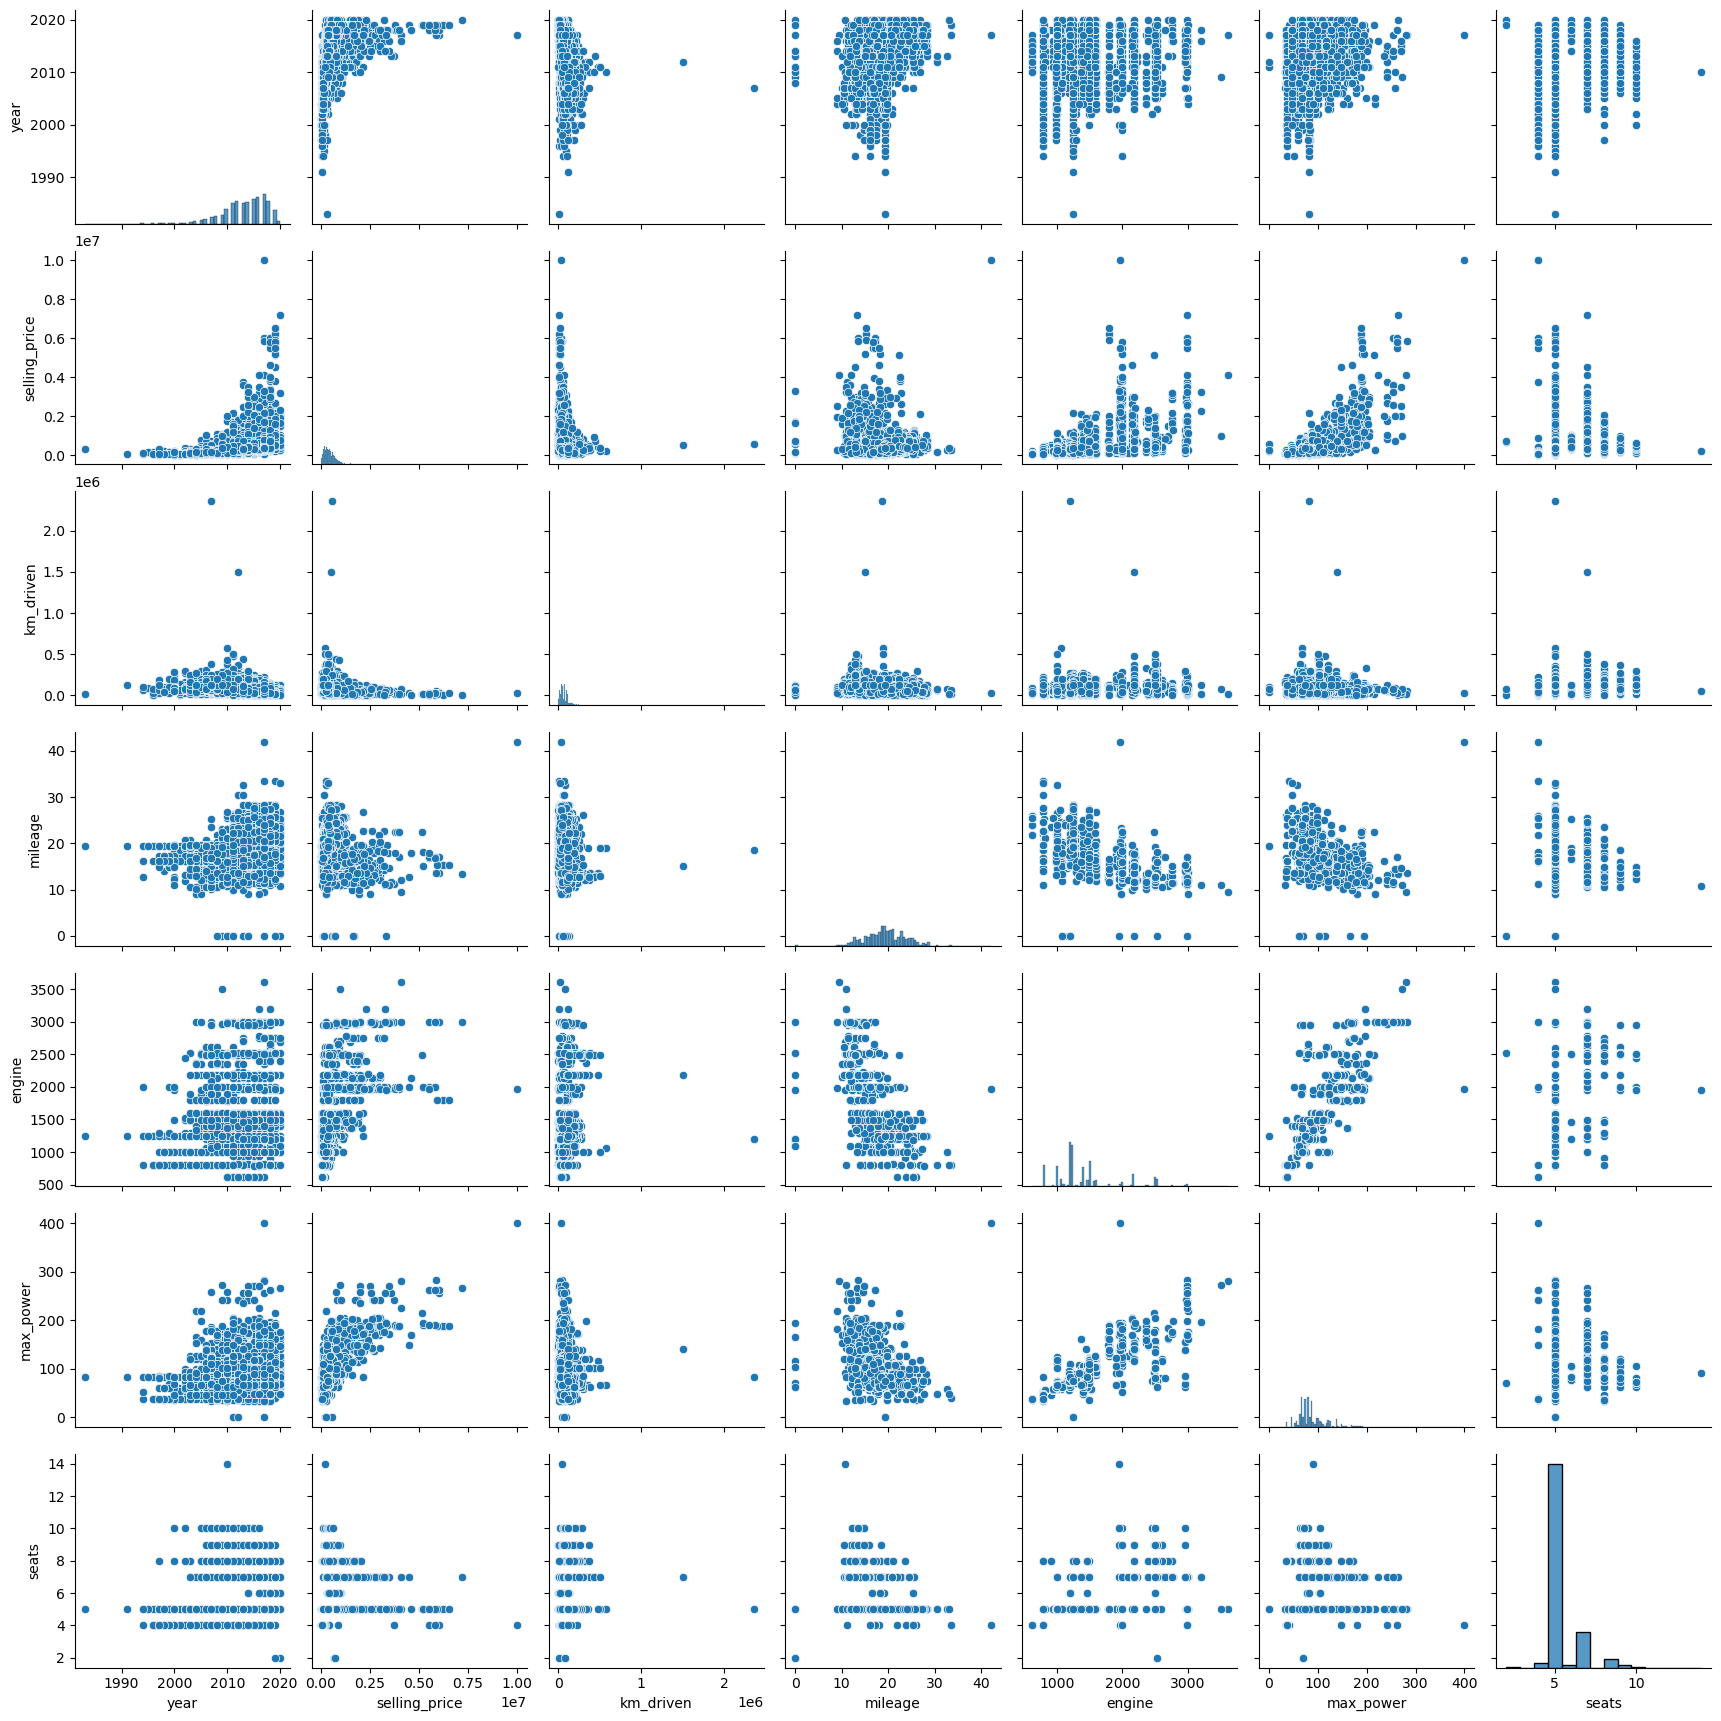

In [38]:
sns.pairplot(df_train)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Исходя из графиков попарных распределений можно сделать следующие выводы о связи предикторов с целевой переменной: 
1. Всвязи с инфляцией, стоимость автомобилей растёт с квадратичной зависимостью с увеличением года.
2. Также, стоимость автомобилей линейно растёт с увеличением мощности и экспоненциально уменьшается с увеличением пробега в километрах.

Наибольшая корреляция наблюдается у признаков `engine` и `max_power`. Это связано с тем, что мощность напрямую зависит от двигателя. Также, прослеживается линейная связь между `selling_price` и `max_power`.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

In [39]:
# your code here

C:\Users\voter\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


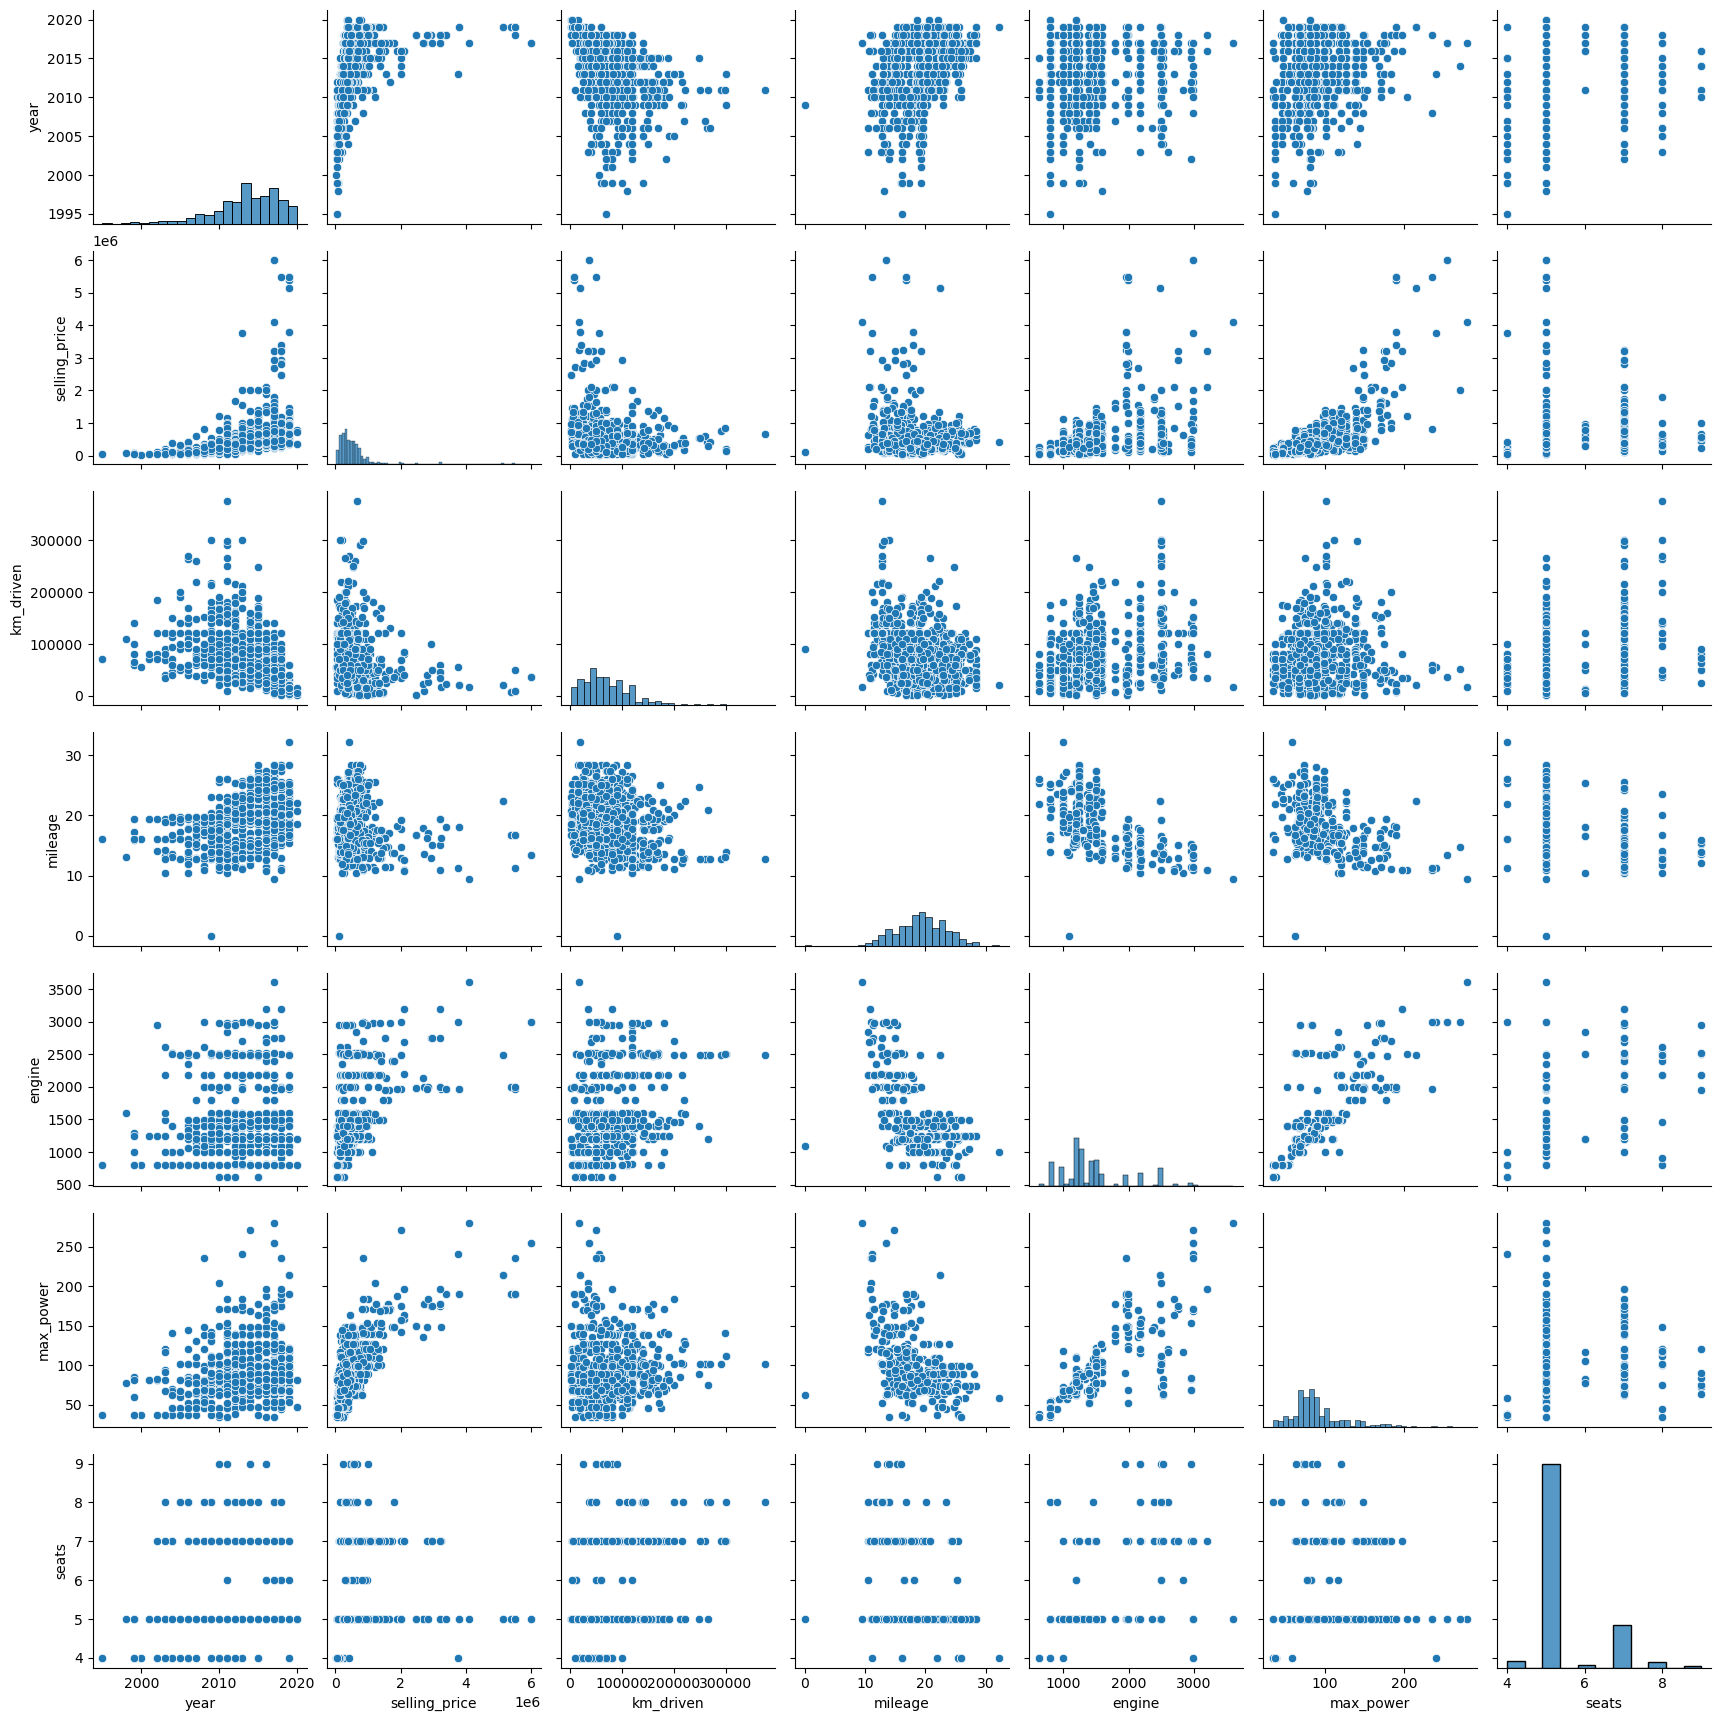

In [40]:
sns.pairplot(df_test)
plt.show()

In [41]:
print(f'Данные в тренировочной и тестовой выборках похожи. Однако можно заметить, что в тестовой выборке присутствуют два автомобиля с гораздо большим пробегом (km_driven).')

Данные в тренировочной и тестовой выборках похожи. Однако можно заметить, что в тестовой выборке присутствуют два автомобиля с гораздо большим пробегом (km_driven).


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [42]:
# your code here

In [43]:
cat_features_mask = (df_train.dtypes == "object").values
df_train_real = df_train[df_train.columns[~cat_features_mask]]

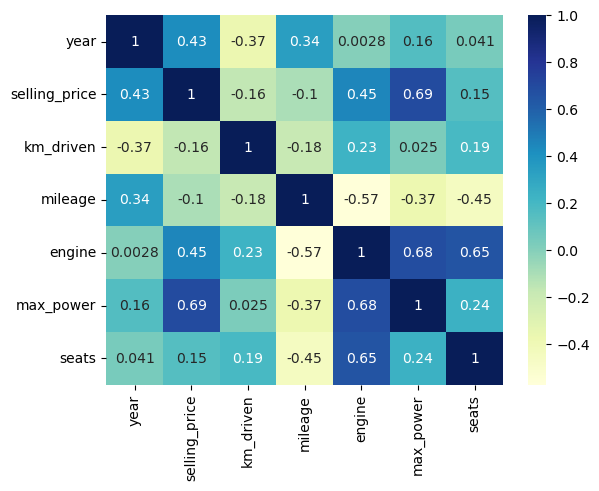

In [44]:
sns.heatmap(df_train_real.corr(), cmap="YlGnBu", annot=True)
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

> **Ответы:**
> 1. Наименее скоррелированы между собой признаки `year` и `engine`.
2. Сильная положительная линейная зависимость наблюдается между признаками `max_power` и `selling_price`, `max_power` и `engine`, `seats` и `engine`.
3. Неправильно, так как количество наезженных километров имеет распределение, близкое к нормальному, в зависимости от года.  

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

In [45]:
# your code here

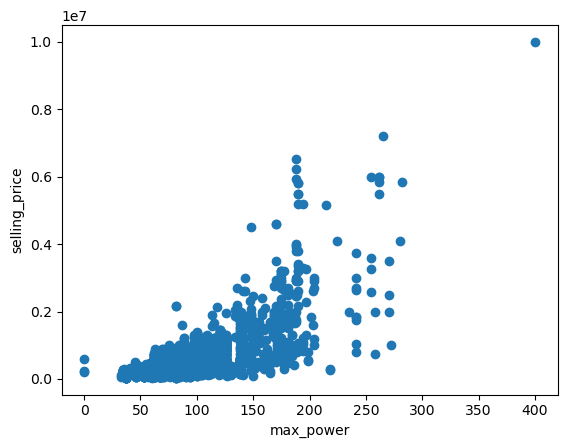

In [46]:
plt.scatter(df_train.max_power, df_train.selling_price)
plt.xlabel('max_power')
plt.ylabel('selling_price')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [47]:
# your code here

Также, изобразим линейную связь признаков `max_power` и `engine`, а также квадратичную связь `selling_price` и `year`:

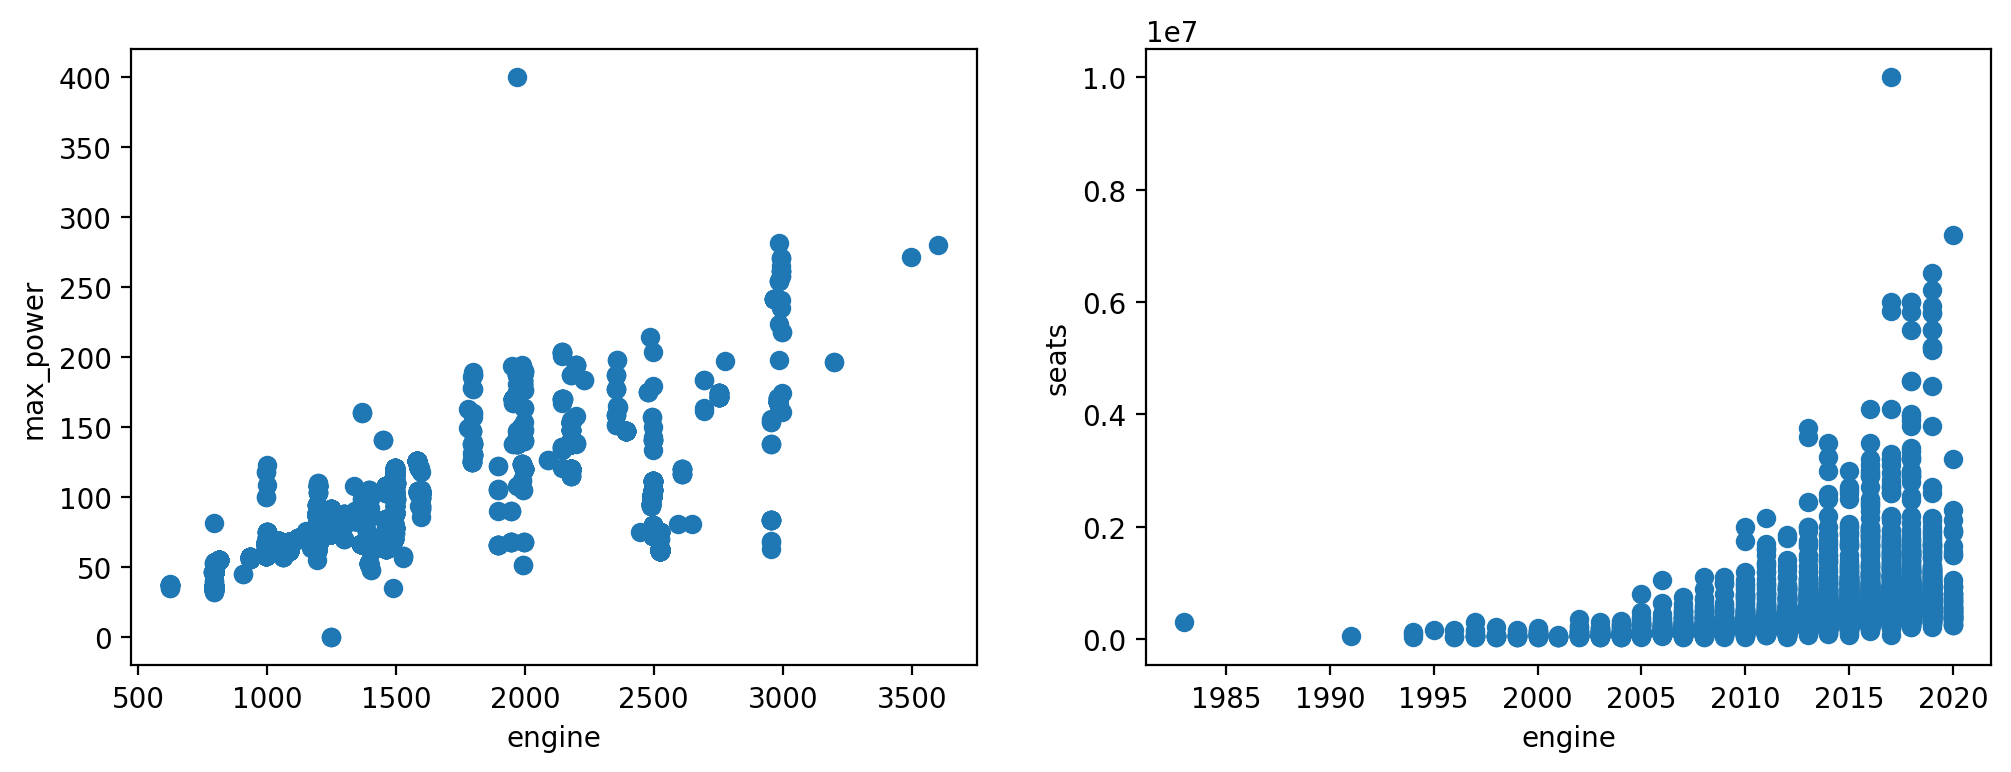

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=200)

ax[0].scatter(df_train.engine, df_train.max_power)
ax[0].set_xlabel('engine')
ax[0].set_ylabel('max_power')

ax[1].scatter(df_train.year, df_train.selling_price)
ax[1].set_xlabel('engine')
ax[1].set_ylabel('seats')

plt.show()

Построим распределения признаков (кроме `name`) тренировочной и тестовой выборок: 

C:\Users\voter\AppData\Local\Temp\ipykernel_12016\988967478.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontdict=font_ticks)
C:\Users\voter\AppData\Local\Temp\ipykernel_12016\988967478.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), fontdict=font_ticks)
C:\Users\voter\AppData\Local\Temp\ipykernel_12016\988967478.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontdict=font_ticks)
C:\Users\voter\AppData\Local\Temp\ipykernel_12016\988967478.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels(), fontdict=font_ticks)


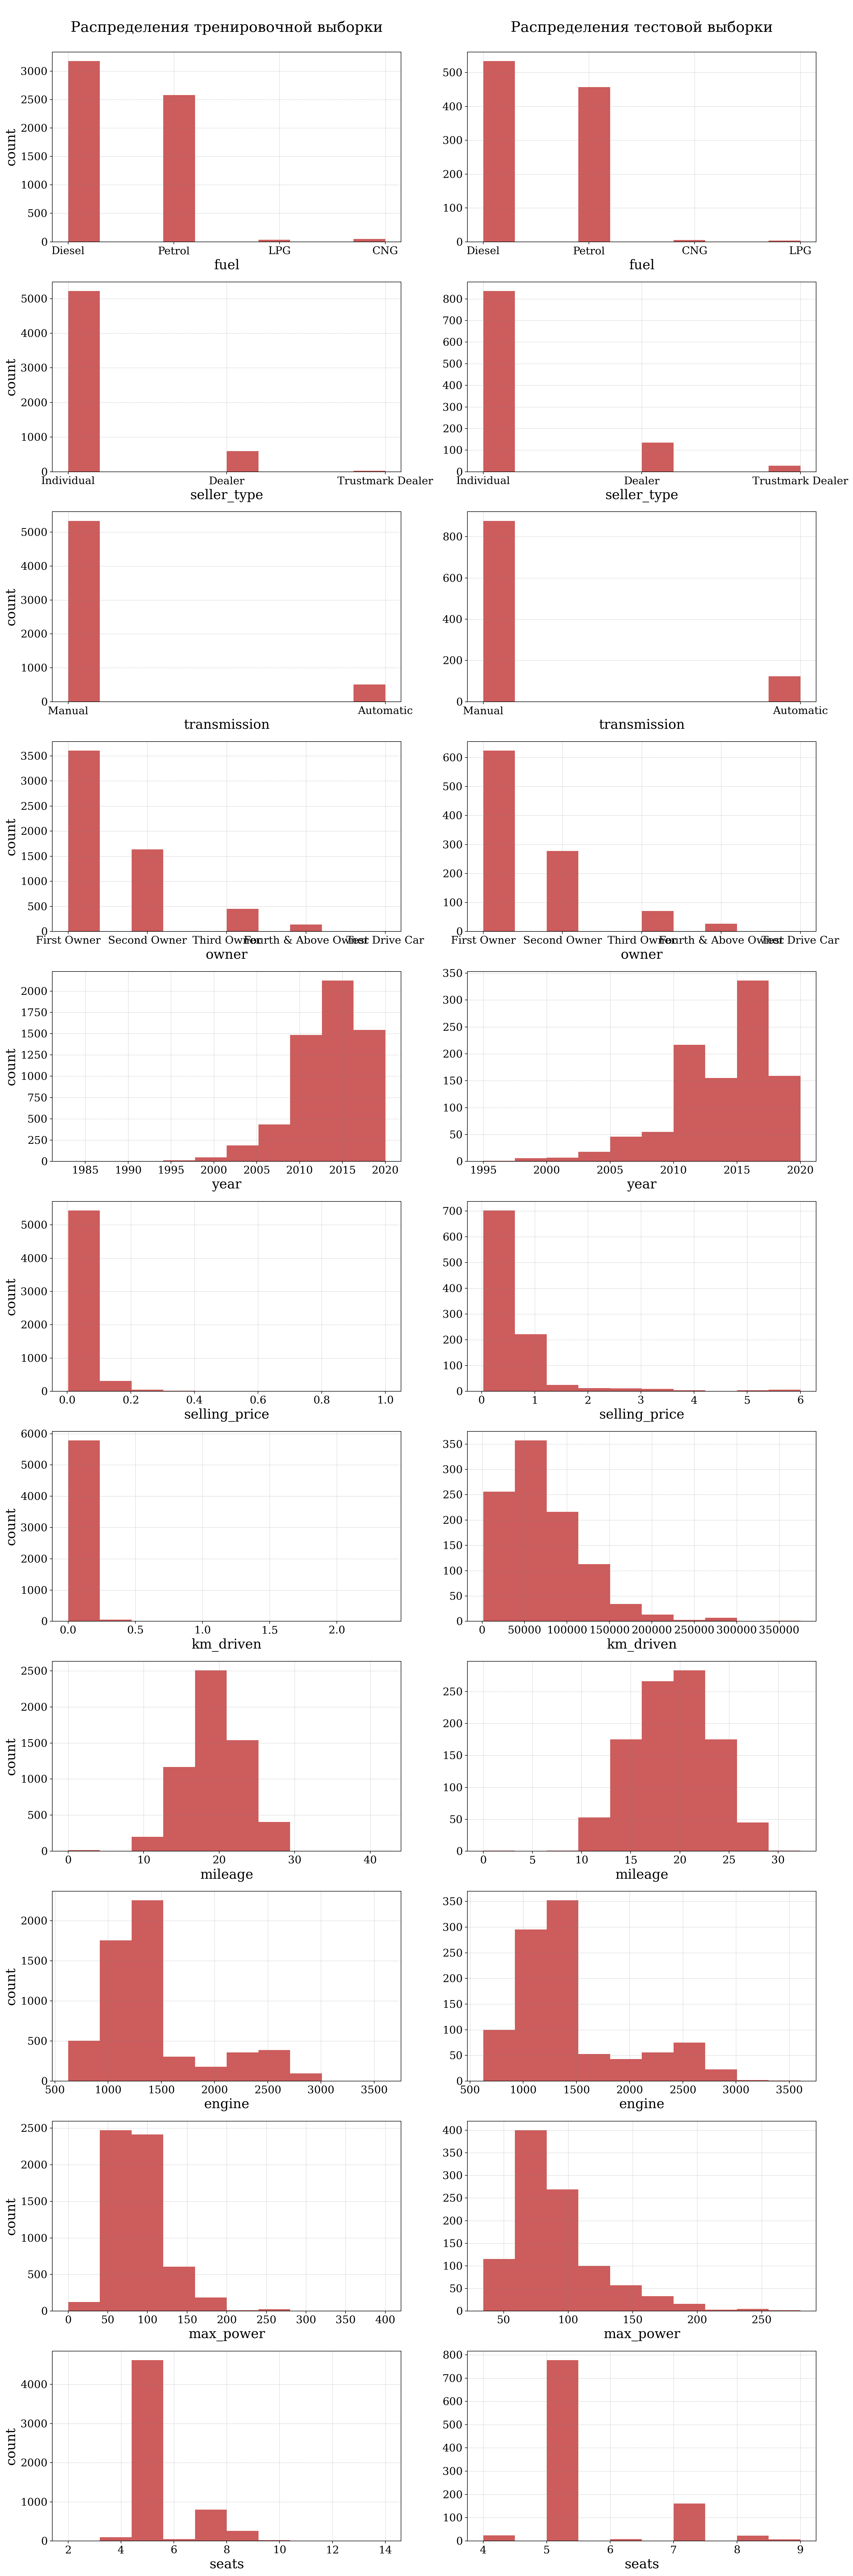

In [49]:
fig, ax = plt.subplots(11, 2, figsize=(18, 54), dpi=180)

font_ticks = {'family': 'serif','color': 'black','size': 16}
font_title = {'family': 'serif','color': 'black','size': 22}
font_labels = {'family': 'serif','color': 'black','size': 20}

xlabels = list(df_train.columns.drop('name'))
for i in range(1, 22, 2):
    ax1 = plt.subplot(11, 2, i)
    ax2 = plt.subplot(11, 2, i + 1)
    
    ax1.hist(df_train[df_train.columns[(i + 1) // 2]], color = 'indianred')
    ax2.hist(df_test[df_test.columns[(i + 1) // 2]], color = 'indianred')
    
    ax1.set_xlabel(xlabels[(i - 1) // 2], fontdict=font_labels)
    ax2.set_xlabel(xlabels[(i - 1) // 2], fontdict=font_labels)
    ax1.set_ylabel('count', fontdict=font_labels)
    
    ax1.set_xticklabels(ax1.get_xticklabels(), fontdict=font_ticks)
    ax2.set_xticklabels(ax2.get_xticklabels(), fontdict=font_ticks)
    ax1.set_yticklabels(ax1.get_yticklabels(), fontdict=font_ticks)
    ax2.set_yticklabels(ax2.get_yticklabels(), fontdict=font_ticks)
    
    ax1.grid(color='gray', linestyle='--', linewidth=0.25)
    ax2.grid(color='gray', linestyle='--', linewidth=0.25)
    
    
ax[0][0].set_title('\nРаспределения тренировочной выборки\n', fontdict=font_title)
ax[0][1].set_title('\nРаспределения тестовой выборки\n', fontdict=font_title)

plt.tight_layout()
plt.show()

По данным графикам можно сделать вывод, что данные при разделении на тренировочную и тестовую выборки оказались похожими. Также, видно, что в тренировочной выборке в признаке `km_driven` вероятно есть выбросы.

Построим `boxplot` для признаков `km_driven` и `selling_price`:

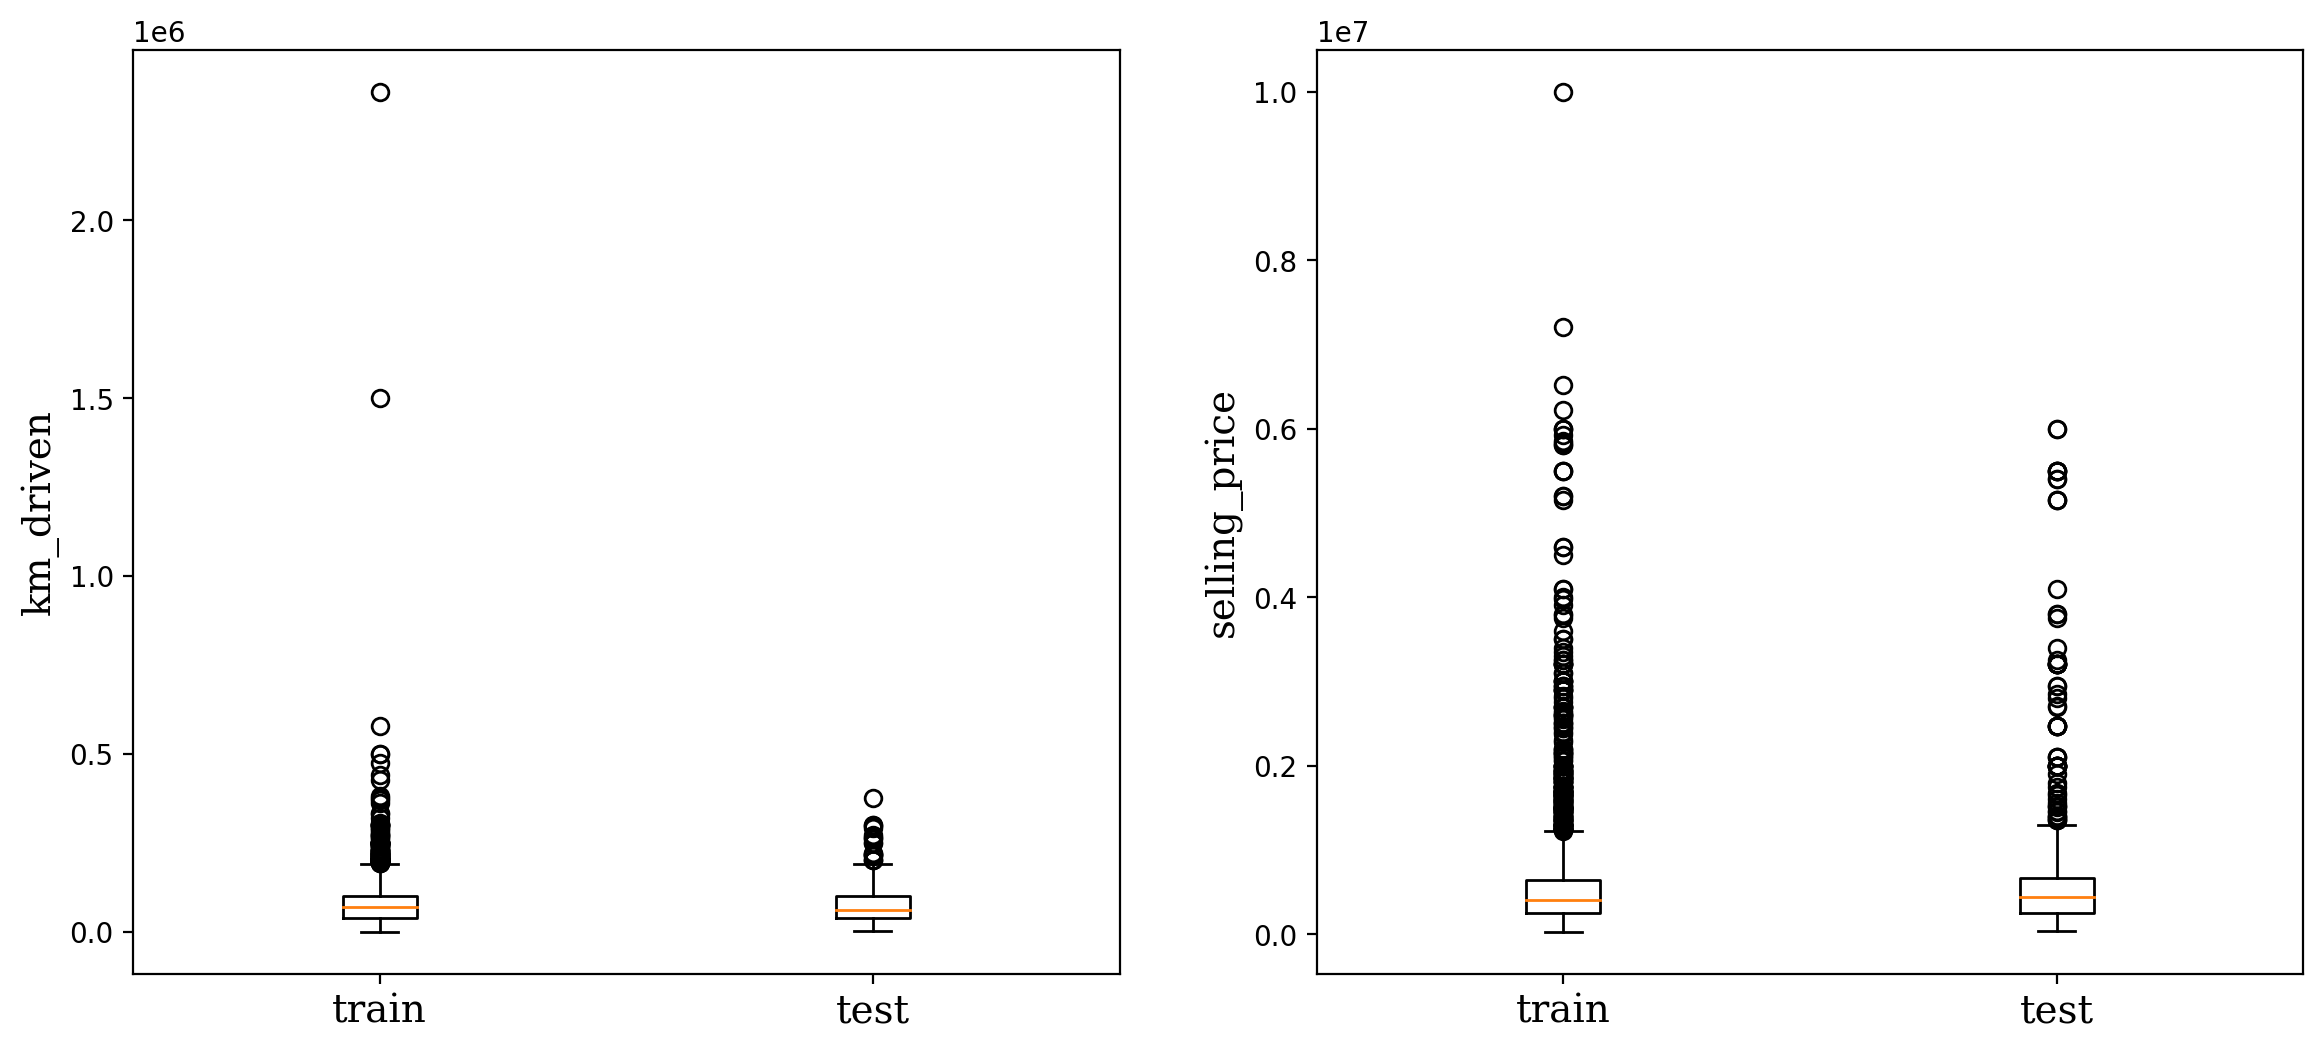

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), dpi=200)

font = {'family': 'serif','color': 'black','size': 14}

ax[0].boxplot([df_train.km_driven, df_test.km_driven], labels=['train', 'test'])
ax[1].boxplot([df_train.selling_price, df_test.selling_price], labels=['train', 'test'])

ax[0].set_xticklabels(ax[0].get_xticklabels(), fontdict=font)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontdict=font)
ax[0].set_ylabel('km_driven', fontdict=font)
ax[1].set_ylabel('selling_price', fontdict=font)

plt.show()

Видны два явных выброса в признаке `km_driven`. В стоимостях автомобилей тоже есть множество объектов, выходящих за 100-й процентиль. 

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [51]:
y_train = pd.DataFrame(df_train['selling_price'])
X_train = df_train.drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])

In [52]:
assert X_train.shape == (5840, 6)

In [53]:
y_test = pd.DataFrame(df_test['selling_price'])
X_test = df_test.drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])

In [54]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# результаты 
print(f'TRAIN\n R2: {r2_score(y_train, y_pred_train):.3f}\n MSE: {MSE(y_train, y_pred_train):.0f}\n')
print(f'TEST\n R2: {r2_score(y_test, y_pred_test):.3f}\n MSE: {MSE(y_test, y_pred_test):.0f}')

TRAIN
 R2: 0.592
 MSE: 116874153930

TEST
 R2: 0.594
 MSE: 233298779730


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [56]:
from sklearn.preprocessing import StandardScaler

# your code here
normalizer = StandardScaler().fit(X_train)
X_train = pd.DataFrame(data=normalizer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=normalizer.transform(X_test), columns=X_test.columns)

# обучаем модель
model_norm = LinearRegression()
model_norm.fit(X_train, y_train)

y_pred_train = model_norm.predict(X_train)
y_pred_test = model_norm.predict(X_test)

# результаты 
print(f'TRAIN\n R2: {r2_score(y_train, y_pred_train):.3f}\n MSE: {MSE(y_train, y_pred_train):.0f}\n')
print(f'TEST\n R2: {r2_score(y_test, y_pred_test):.3f}\n MSE: {MSE(y_test, y_pred_test):.0f}')

TRAIN
 R2: 0.592
 MSE: 116874153930

TEST
 R2: 0.594
 MSE: 233298779730


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [57]:
# your code here

In [58]:
print(f'Наиболее информативный признак: {df_train.columns[model_norm.coef_.argmax()]} (потому что он имеет наибольший вес).')

Наиболее информативный признак: owner (потому что он имеет наибольший вес).


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [59]:
from sklearn.linear_model import Lasso

# your code here
model_l1 = Lasso()
model_l1.fit(X_train, y_train)

y_pred_train = model_l1.predict(X_train)
y_pred_test = model_l1.predict(X_test)

# результаты
print(f'TRAIN\n R2: {r2_score(y_train, y_pred_train):.3f}\n MSE: {MSE(y_train, y_pred_train):.0f}\n')
print(f'TEST\n R2: {r2_score(y_test, y_pred_test):.3f}\n MSE: {MSE(y_test, y_pred_test):.0f}')

TRAIN
 R2: 0.592
 MSE: 116874153940

TEST
 R2: 0.594
 MSE: 233299450599


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [60]:
# your code here

In [61]:
model_l1.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

In [62]:
print(f'Нет, так как веса значительно меньше по модулю, чем целевая переменая (и коэф. alpha = 1.0)')

Нет, так как веса значительно меньше по модулю, чем целевая переменая (и коэф. alpha = 1.0)


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [63]:
from sklearn.model_selection import GridSearchCV

# your code here
param_grid = {'alpha': list(np.linspace(0.0, 100000.0, 100))}
grid_search = GridSearchCV(Lasso(), param_grid, refit=True, cv=10, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\voter\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.541e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.052e+14, tolerance: 1.507e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0, 1010.10101010101, 2020.20202020202,
                                   3030.30303030303, 4040.40404040404,
                                   5050.50505050505, 6060.60606060606,
                                   7070.707070707071, 8080.80808080808,
                                   9090.90909090909, 10101.0101010101,
                                   11111.111111111111, 12121.21212121212,
                                   13131.31313131313, 14141.414141414141,
                                   15151.51515151515, 16161.61616161616,
                                   17171.71717171717, 18181.81818181818,
                                   19191.91919191919, 20202.0202020202,
                                   21212.121212121212, 22222.222222222223,
                                   23232.32323232323, 24242.42424242424,
                                   25252.52525252525, 26262.62626262626,
                                   27272.727272727272, 28282.828282828283,
                                   29292.92929292929, ...]},
             verbose=1)

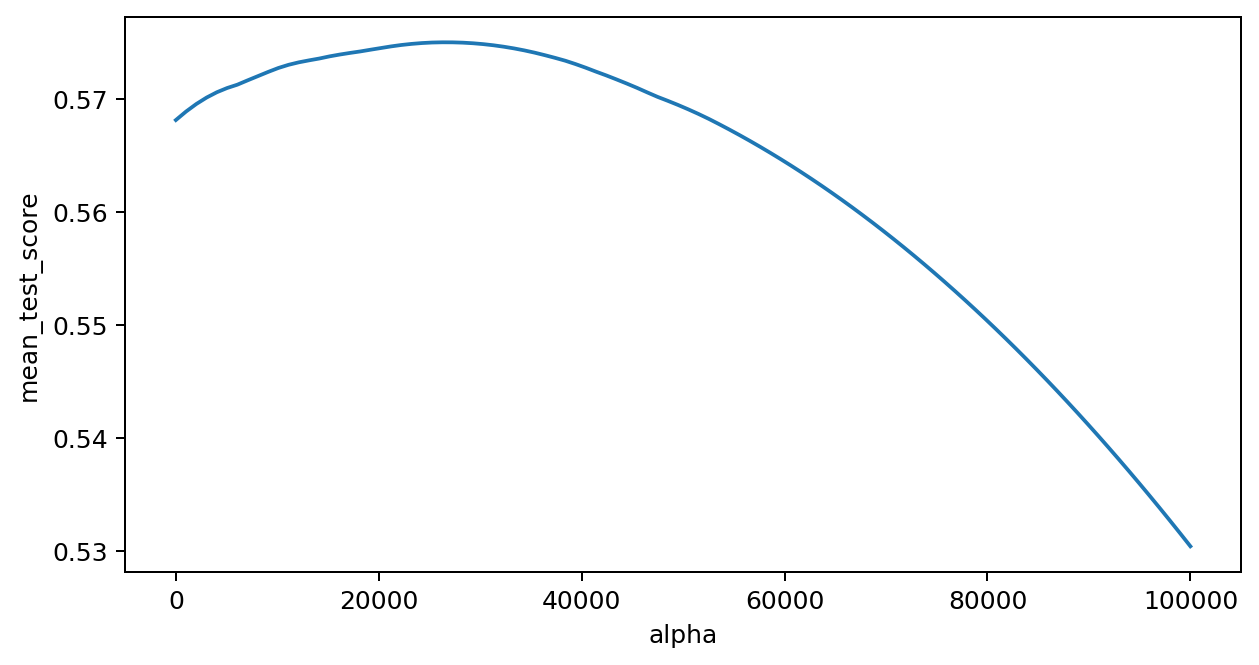

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=180)
ax.plot(np.linspace(0.0, 100000.0, 100), pd.DataFrame(grid_search.cv_results_)['mean_test_score'])
ax.set_xlabel('alpha')
ax.set_ylabel('mean_test_score')
plt.show()

In [65]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.042266      0.005693         0.000901        0.001223          0.0   
1        0.003571      0.004190         0.001416        0.000939   1010.10101   
2        0.006303      0.007721         0.000102        0.000306   2020.20202   
3        0.000000      0.000000         0.004690        0.007165   3030.30303   
4        0.000794      0.001600         0.001870        0.004630   4040.40404   
..            ...           ...              ...             ...          ...   
95       0.002701      0.000459         0.001600        0.000490  95959.59596   
96       0.002699      0.000457         0.001500        0.000500  96969.69697   
97       0.002501      0.000500         0.001701        0.000459  97979.79798   
98       0.002602      0.000491         0.001600        0.000490  98989.89899   
99       0.002600      0.000488         0.001701        0.000458     100000.0   

                          params  split0_test_score  split1_test_score  \
0                 {'alpha': 0.0}           0.562418           0.589457   
1    {'alpha': 1010.10101010101}           0.560934           0.588783   
2    {'alpha': 2020.20202020202}           0.559413           0.587999   
3    {'alpha': 3030.30303030303}           0.557864           0.587115   
4    {'alpha': 4040.40404040404}           0.556286           0.586131   
..                           ...                ...                ...   
95  {'alpha': 95959.59595959596}           0.436570           0.554721   
96  {'alpha': 96969.69696969696}           0.434947           0.553729   
97  {'alpha': 97979.79797979798}           0.433317           0.552720   
98  {'alpha': 98989.89898989898}           0.431680           0.551692   
99           {'alpha': 100000.0}           0.430037           0.550647   

    split2_test_score  split3_test_score  split4_test_score  \
0            0.644361           0.586411           0.424151   
1            0.644244           0.586981           0.431851   
2            0.644037           0.587478           0.439339   
3            0.643737           0.587901           0.446568   
4            0.643344           0.588250           0.453536   
..                ...                ...                ...   
95           0.574358           0.550926           0.579974   
96           0.573137           0.549897           0.579278   
97           0.571902           0.548853           0.578560   
98           0.570654           0.547795           0.577822   
99           0.569392           0.546721           0.577062   

    split5_test_score  split6_test_score  split7_test_score  \
0            0.663528           0.476519           0.620069   
1            0.662345           0.477138           0.620869   
2            0.661086           0.477709           0.621571   
3            0.659756           0.478223           0.622174   
4            0.658355           0.478681           0.622679   
..                ...                ...                ...   
95           0.568796           0.423927           0.587643   
96           0.567391           0.422827           0.586583   
97           0.565974           0.421717           0.585506   
98           0.564544           0.420597           0.584413   
99           0.563102           0.419466           0.583303   

    split8_test_score  split9_test_score  mean_test_score  std_test_score  \
0            0.548264           0.566263         0.568144        0.069247   
1            0.549232           0.566646         0.568902        0.067446   
2            0.550077           0.566965         0.569567        0.065706   
3            0.550796           0.567219         0.570135        0.064040   
4            0.551388           0.567406         0.570606        0.062446   
..                ...                ...              ...             ...   
95           0.558877           0.513370         0.534916        0.055849   
96          

In [66]:
# результаты с наилучшим alpha
model_l1 = grid_search.best_estimator_

y_pred_train = model_l1.predict(X_train)
y_pred_test = model_l1.predict(X_test)

# результаты
print(f'TRAIN\n R2: {r2_score(y_train, y_pred_train):.3f}\n MSE: {MSE(y_train, y_pred_train):.0f}\n')
print(f'TEST\n R2: {r2_score(y_test, y_pred_test):.3f}\n MSE: {MSE(y_test, y_pred_test):.0f}')

TRAIN
 R2: 0.583
 MSE: 119605817484

TEST
 R2: 0.565
 MSE: 250115889871


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [67]:
print(f'Грид-сёрчку пришлось обучать 1000 моделей.')

Грид-сёрчку пришлось обучать 1000 моделей.


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [68]:
# your code here

In [69]:
grid_search.best_params_

{'alpha': 26262.62626262626}

In [70]:
print(f'Наилучшим коэффициентом регуляризации оказался alpha=26263. ')

Наилучшим коэффициентом регуляризации оказался alpha=26263. 


In [71]:
grid_search.best_estimator_.coef_

array([146055.57728654, -16015.5395359 ,      0.        ,      0.        ,
       322144.13804758,     -0.        ])

In [72]:
print(f'Да, занулились веса при наименее важных признаках.')

Да, занулились веса при наименее важных признаках.


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [73]:
from sklearn.linear_model import ElasticNet

# your code here
param_grid_EN = {'alpha': list(np.linspace(0.0, 100000.0, 100)), 'l1_ratio': list(np.linspace(0.0, 1, 10))}
grid_search_EN = GridSearchCV(ElasticNet(), param_grid_EN, refit=True, cv=10, verbose=1)

grid_search_EN.fit(X_train, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


C:\Users\voter\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.541e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.193e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinat

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.193e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinat

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.193e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinat

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.193e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinat

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.193e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinat

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.141e+14, tolerance: 1.521e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinat

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.141e+14, tolerance: 1.521e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinat

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.141e+14, tolerance: 1.521e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinat

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.141e+14, tolerance: 1.521e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinat

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.596e+14, tolerance: 1.521e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.669e+14, tolerance: 1.535e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.233e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.819e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.234e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.820e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.234e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.821e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.234e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.821e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.234e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.821e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.234e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.821e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.751e+14, tolerance: 1.550e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.393e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.393e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.393e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.393e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.751e+14, tolerance: 1.550e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.986e+14, tolerance: 1.597e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.751e+14, tolerance: 1.550e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.751e+14, tolerance: 1.550e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.751e+14, tolerance: 1.550e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.751e+14, tolerance: 1.550e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.394e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\voter\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.0, 1010.10101010101, 2020.20202020202,
                                   3030.30303030303, 4040.40404040404,
                                   5050.50505050505, 6060.60606060606,
                                   7070.707070707071, 8080.80808080808,
                                   9090.90909090909, 10101.0101010101,
                                   11111.111111111111, 12121.21212121212,
                                   13131.31313131313, 14141.414141414141,
                                   15151.51515151515, 16161.61616161616,
                                   17...
                                   21212.121212121212, 22222.222222222223,
                                   23232.32323232323, 24242.42424242424,
                                   25252.52525252525, 26262.62626262626,
                                   27272.727272727272, 28282.828282828283,
                                   29292.92929292929, ...],
                         'l1_ratio': [0.0, 0.1111111111111111,
                                      0.2222222222222222, 0.3333333333333333,
                                      0.4444444444444444, 0.5555555555555556,
                                      0.6666666666666666, 0.7777777777777777,
                                      0.8888888888888888, 1.0]},
             verbose=1)

In [74]:
pd.DataFrame(grid_search_EN.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0         0.037006      0.006708         0.001902        0.000300         0.0   
1         0.041942      0.008053         0.001971        0.004601         0.0   
2         0.041211      0.006920         0.002654        0.005072         0.0   
3         0.038797      0.005590         0.004840        0.007404         0.0   
4         0.042840      0.007540         0.000480        0.000975         0.0   
..             ...           ...              ...             ...         ...   
995       0.001564      0.004693         0.001563        0.004688    100000.0   
996       0.003125      0.006251         0.001563        0.004688    100000.0   
997       0.001562      0.004687         0.003125        0.006251    100000.0   
998       0.003125      0.006250         0.001563        0.004688    100000.0   
999       0.001563      0.004688         0.003125        0.006249    100000.0   

    param_l1_ratio                                             params  \
0              0.0                    {'alpha': 0.0, 'l1_ratio': 0.0}   
1         0.111111     {'alpha': 0.0, 'l1_ratio': 0.1111111111111111}   
2         0.222222     {'alpha': 0.0, 'l1_ratio': 0.2222222222222222}   
3         0.333333     {'alpha': 0.0, 'l1_ratio': 0.3333333333333333}   
4         0.444444     {'alpha': 0.0, 'l1_ratio': 0.4444444444444444}   
..             ...                                                ...   
995       0.555556  {'alpha': 100000.0, 'l1_ratio': 0.555555555555...   
996       0.666667  {'alpha': 100000.0, 'l1_ratio': 0.666666666666...   
997       0.777778  {'alpha': 100000.0, 'l1_ratio': 0.777777777777...   
998       0.888889  {'alpha': 100000.0, 'l1_ratio': 0.888888888888...   
999            1.0               {'alpha': 100000.0, 'l1_ratio': 1.0}   

     split0_test_score  split1_test_score  split2_test_score  \
0             0.562418           0.589457           0.644361   
1             0.562418           0.589457           0.644361   
2             0.562418           0.589457           0.644361   
3             0.562418           0.589457           0.644361   
4             0.562418           0.589457           0.644361   
..                 ...                ...                ...   
995          -0.024867          -0.018193          -0.002877   
996          -0.024861          -0.018183          -0.002867   
997          -0.024850          -0.018162          -0.002848   
998          -0.024817          -0.018098          -0.002790   
999           0.430037           0.550647           0.569392   

     split3_test_score  split4_test_score  split5_test_score  \
0             0.586411           0.424151           0.663528   
1             0.586411           0.424151           0.663528   
2             0.586411           0.424151           0.663528   
3             0.586411           0.424151           0.663528   
4             0.586411           0.424151           0.663528   
..                 ...                ...                ...   
995          -0.007488          -0.013653          -0.008487   
996          -0.007479          -0.013640          -0.008479   
997          -0.007459          -0.013615          -0.008461   
998          -0.007401          -0.013538          -0.008409   
999           0.546721           0.577062           0.563102   

     split6_test_score  split7_test_score  split8_test_score  \
0             0.476519           0.620069           0.548264   
1             0.476519           0.620069           0.548264   
2             0.476519           0.620069           0.548264   
3             0.476519           0.620069           0.548264   
4             0.476519           0.620069           0.548264   
..                 ...                ...                ...   
995          -0.000192          -0.006994          -0.035707   
996          -0.000186          -0.006983          -0.035695   
997          -0.000173          -0.006962

In [75]:
model_EN = grid_search_EN.best_estimator_

y_pred_train = model_EN.predict(X_train)
y_pred_test = model_EN.predict(X_test)

# результаты
print(f'TRAIN\n R2: {r2_score(y_train, y_pred_train):.3f}\n MSE: {MSE(y_train, y_pred_train):.0f}\n')
print(f'TEST\n R2: {r2_score(y_test, y_pred_test):.3f}\n MSE: {MSE(y_test, y_pred_test):.0f}')

TRAIN
 R2: 0.583
 MSE: 119605817484

TEST
 R2: 0.565
 MSE: 250115889871


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [76]:
# your code here

In [77]:
grid_search_EN.best_params_

{'alpha': 26262.62626262626, 'l1_ratio': 1.0}

In [78]:
print(f'Наилучшая модель оказалась идентичной модели Lasso.')

Наилучшая модель оказалась идентичной модели Lasso.


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [79]:
# your code here

In [80]:
X_train_cat = df_train.drop(columns=['selling_price', 'name'])
X_test_cat = df_test.drop(columns=['selling_price', 'name'])

X_train_cat['seats'] = X_train_cat['seats'].astype('str')
X_test_cat['seats'] = X_test_cat['seats'].astype('str')

In [81]:
assert X_train_cat.shape == (5840, 10)

In [82]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner seats
count     5840        5840         5840         5840  5840
unique       4           3            2            5     9
top     Diesel  Individual       Manual  First Owner     5
freq      3177        5223         5336         3603  4618

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [83]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

cat_features_mask = (X_train_cat.dtypes == "object").values
encoder.fit(X_train_cat[X_train_cat.columns[cat_features_mask]])

X_train_cat = pd.concat([X_train_cat[X_train_cat.columns[~cat_features_mask]], pd.DataFrame(encoder.transform(X_train_cat[X_train_cat.columns[cat_features_mask]]).toarray())], axis=1)
X_test_cat = pd.concat([X_test_cat[X_test_cat.columns[~cat_features_mask]], pd.DataFrame(encoder.transform(X_test_cat[X_test_cat.columns[cat_features_mask]]).toarray())], axis=1)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [84]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
X_train_cat.columns = X_train_cat.columns.astype(str)
X_test_cat.columns = X_test_cat.columns.astype(str)

param_grid_Ridge = {'alpha': list(np.linspace(0.0, 100000.0, 100))}
grid_search_Ridge = GridSearchCV(Ridge(), param_grid_Ridge, scoring='r2', refit=True, cv=10, verbose=1)
grid_search_Ridge.fit(X_train_cat, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0, 1010.10101010101, 2020.20202020202,
                                   3030.30303030303, 4040.40404040404,
                                   5050.50505050505, 6060.60606060606,
                                   7070.707070707071, 8080.80808080808,
                                   9090.90909090909, 10101.0101010101,
                                   11111.111111111111, 12121.21212121212,
                                   13131.31313131313, 14141.414141414141,
                                   15151.51515151515, 16161.61616161616,
                                   17171.71717171717, 18181.81818181818,
                                   19191.91919191919, 20202.0202020202,
                                   21212.121212121212, 22222.222222222223,
                                   23232.32323232323, 24242.42424242424,
                                   25252.52525252525, 26262.62626262626,
                                   27272.727272727272, 28282.828282828283,
                                   29292.92929292929, ...]},
             scoring='r2', verbose=1)

In [85]:
pd.DataFrame(grid_search_Ridge.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.004503      0.000805         0.002300    4.582965e-04          0.0   
1        0.003499      0.000669         0.002501    5.006104e-04   1010.10101   
2        0.004300      0.000461         0.002401    4.895718e-04   2020.20202   
3        0.003801      0.000600         0.002000    2.861023e-07   3030.30303   
4        0.003701      0.000641         0.002000    4.792154e-07   4040.40404   
..            ...           ...              ...             ...          ...   
95       0.003603      0.000492         0.002000    4.550049e-06  95959.59596   
96       0.003601      0.000490         0.002200    4.000545e-04  96969.69697   
97       0.003661      0.000448         0.002300    4.582093e-04  97979.79798   
98       0.003601      0.000490         0.002000    7.629395e-07  98989.89899   
99       0.003401      0.000490         0.002000    1.862109e-07     100000.0   

                          params  split0_test_score  split1_test_score  \
0                 {'alpha': 0.0}           0.604427           0.670537   
1    {'alpha': 1010.10101010101}           0.577578           0.613287   
2    {'alpha': 2020.20202020202}           0.572035           0.602702   
3    {'alpha': 3030.30303030303}           0.569815           0.598100   
4    {'alpha': 4040.40404040404}           0.568653           0.595562   
..                           ...                ...                ...   
95  {'alpha': 95959.59595959596}           0.553751           0.567510   
96  {'alpha': 96969.69696969696}           0.553597           0.567271   
97  {'alpha': 97979.79797979798}           0.553442           0.567033   
98  {'alpha': 98989.89898989898}           0.553288           0.566797   
99           {'alpha': 100000.0}           0.553134           0.566562   

    split2_test_score  split3_test_score  split4_test_score  \
0            0.685981           0.619590           0.495545   
1            0.661025           0.605645           0.448377   
2            0.653851           0.599101           0.434467   
3            0.650383           0.596107           0.426285   
4            0.648244           0.594418           0.420229   
..                ...                ...                ...   
95           0.610448           0.574657           0.234323   
96           0.610185           0.574478           0.233158   
97           0.609925           0.574301           0.232002   
98           0.609666           0.574124           0.230856   
99           0.609409           0.573948           0.229720   

    split5_test_score  split6_test_score  split7_test_score  \
0            0.723797           0.571109           0.574267   
1            0.680072           0.496006           0.644140   
2            0.672443           0.488583           0.636002   
3            0.669264           0.485122           0.632536   
4            0.667541           0.483042           0.630675   
..                ...                ...                ...   
95           0.648400           0.453501           0.613011   
96           0.648225           0.453298           0.612834   
97           0.648050           0.453095           0.612658   
98           0.647876           0.452894           0.612483   
99           0.647703           0.452694           0.612309   

    split8_test_score  split9_test_score  mean_test_score  std_test_score  \
0            0.638829           0.581102         0.616518        0.062961   
1            0.580149           0.579288         0.588557        0.067906   
2            0.566470           0.575036         0.580069        0.069155   
3            0.560479           0.572929         0.576102        0.070201   
4            0.557121           0.571680         0.573717        0.071129   
..                ...                ...              ...             ...   
95           0.523055           0.553787         0.533244        0.111862   
96          

In [86]:
grid_search_Ridge.best_params_

{'alpha': 0.0}

In [87]:
model_l2 = grid_search_Ridge.best_estimator_

y_pred_train_ridge = model_l2.predict(X_train_cat)
y_pred_test_ridge = model_l2.predict(X_test_cat)

# результаты
print(f'TRAIN\n R2: {r2_score(y_train, y_pred_train_ridge):.3f}\n MSE: {MSE(y_train, y_pred_train_ridge):.0f}\n')
print(f'TEST\n R2: {r2_score(y_test, y_pred_test_ridge):.3f}\n MSE: {MSE(y_test, y_pred_test_ridge):.0f}')

TRAIN
 R2: 0.667
 MSE: 95368540019

TEST
 R2: 0.626
 MSE: 215039696273


Немного удалось повысить качество модели.

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [88]:
# your code here

In [89]:
X_train = df_train.drop(columns=['selling_price', 'name'])
X_test = df_test.drop(columns=['selling_price', 'name'])

X_train['seats'] = X_train['seats'].astype('str')
X_test['seats'] = X_test['seats'].astype('str')

Исходя из графиков зависимости целевой переменной от предикаторов добавим следующие признаки: 
1. Квадрат признака `year`.
2. Экспоненту от признака `km_driven` (не получилось, так как `km_driven` и так большие, а экспонента от них улетает в бесконечность).

In [90]:
X_train['year_squared'] = X_train['year'] ** 2
X_test['year_squared'] = X_test['year'] ** 2

# X_train['km_driven_exp'] = np.exp(X_train['km_driven'])
# X_test['km_driven_exp'] = np.exp(X_test['km_driven'])

Добавим попарные произведения числовых признаков: 

In [91]:
real_columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

for i in range(5):
    for j in range(i, 5):
        if (i == 0) & (j == 0):
            continue
        X_train[real_columns[i] + '_' + real_columns[j]] = X_train[real_columns[i]] * X_train[real_columns[j]]
        X_test[real_columns[i] + '_' + real_columns[j]] = X_test[real_columns[i]] * X_test[real_columns[j]]

Добавим признаки, равные частному пробега автомобиля на остальные числовые признаки:

In [92]:
for i in range(5):
    if (i == 1) | (i == 2) | (i == 4):
        continue
    X_train['km_driven/' + real_columns[i]] = X_train['km_driven'] / X_train[real_columns[i]]
    X_test['km_driven/' + real_columns[i]] = X_test['km_driven'] / X_test[real_columns[i]]

Добавим следующие признаки типа `bool`:
1. Является ли продавец частным лицом и превышает ли пробег среднее значения пробега.
2. Продавец является третьим или более по счёту владельцем.

In [93]:
X_train['ind_km_mean'] = (X_train['seller_type'] == 'Individual') & (X_train['km_driven'] > X_train['km_driven'].mean())
X_train['owner_three'] = (X_train['owner'] != 'First Owner') & (X_train['owner'] != 'Second Owner')

X_test['ind_km_mean'] = (X_test['seller_type'] == 'Individual') & (X_test['km_driven'] > X_train['km_driven'].mean())
X_test['owner_three'] = (X_test['owner'] != 'First Owner') & (X_test['owner'] != 'Second Owner')

Как было замечено ранее, по признаку `km_driven` присутствуют два выброса, удалим их:

In [94]:
X_train['km_driven'].argmax()

2680

In [95]:
X_train = X_train.drop(2680, axis=0)
y_train = y_train.drop(2680, axis=0)

In [96]:
X_train['km_driven'].argmax()

1397

In [97]:
X_train = X_train.drop(1397, axis=0)
y_train = y_train.drop(1397, axis=0)

In [98]:
X_train = X_train.reset_index()
y_train = y_train.reset_index()

X_train = X_train.drop('index', axis=1)
y_train = y_train.drop('index', axis=1)

Добавим индикатор того, были ли пропуски в числовых признаках:  

In [99]:
miss_features = ['engine', 'mileage', 'max_power']

In [100]:
for i in range(3):
    X_train[miss_features[i] + '_miss'] = (X_train[miss_features[i]] == X_train[miss_features[i]].mean())
    X_test[miss_features[i] + '_miss'] = (X_test[miss_features[i]] == X_train[miss_features[i]].mean())

Отлогарифмируем признаки, отклоняющиеся от нормального распределения:

In [101]:
X_train['year_log'] = np.log(X_train['year'])
X_train['engine_log'] = np.log(X_train['engine'])
X_train['km_driven_log'] = np.log(X_train['km_driven'])

X_test['year_log'] = np.log(X_test['year'])
X_test['engine_log'] = np.log(X_test['engine'])
X_test['km_driven_log'] = np.log(X_test['km_driven'])

Попробуем предсказывать логарифм целевой переменной, а для получения реальной стоимости автомобиля будем брать экспоненту от предсказанной величины.

In [102]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

**Применим one-hot кодирование для категориальных признаков и обучим Ridge-модель:**

In [103]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

In [104]:
cat_features_mask = (X_train.dtypes == "object").values
X_train_cat = X_train[X_train.columns[cat_features_mask]]
X_test_cat = X_test[X_test.columns[cat_features_mask]]

In [105]:
encoder.fit(X_train_cat)
X_train = pd.concat([X_train.drop(columns=X_train_cat.columns), pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns=encoder.get_feature_names_out())], axis=1)
X_test = pd.concat([X_test.drop(columns=X_test_cat.columns), pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns=encoder.get_feature_names_out())], axis=1)

import pickle
pickle.dump(encoder, open('encoder.pickle', 'wb'))

Обучение модели и результаты.

In [106]:
normalizer = StandardScaler().fit(X_train)
X_train = pd.DataFrame(data=normalizer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=normalizer.transform(X_test), columns=X_test.columns)

pickle.dump(normalizer, open('normalizer.pickle', 'wb'))

In [107]:
param_grid = {'alpha': list(np.linspace(0.0, 5000.0, 100))}
grid_search = GridSearchCV(Ridge(), param_grid, scoring='r2', refit=True, cv=10, verbose=1)
grid_search.fit(X_train, y_train_log)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0, 50.505050505050505, 101.01010101010101,
                                   151.5151515151515, 202.02020202020202,
                                   252.52525252525254, 303.030303030303,
                                   353.5353535353535, 404.04040404040404,
                                   454.54545454545456, 505.0505050505051,
                                   555.5555555555555, 606.060606060606,
                                   656.5656565656566, 707.070707070707,
                                   757.5757575757576, 808.0808080808081,
                                   858.5858585858585, 909.0909090909091,
                                   959.5959595959596, 1010.1010101010102,
                                   1060.6060606060605, 1111.111111111111,
                                   1161.6161616161617, 1212.121212121212,
                                   1262.6262626262626, 1313.1313131313132,
                                   1363.6363636363637, 1414.141414141414,
                                   1464.6464646464647, ...]},
             scoring='r2', verbose=1)

In [108]:
model = grid_search.best_estimator_
pickle.dump(model, open('model.pickle', 'wb'))

y_pred_train = np.exp(model.predict(X_train))
y_pred_test = np.exp(model.predict(X_test))

# результаты
print(f'TRAIN\n R2: {r2_score(y_train, y_pred_train):.3f}\n MSE: {MSE(y_train, y_pred_train):.0f}\n')
print(f'TEST\n R2: {r2_score(y_test, y_pred_test):.3f}\n MSE: {MSE(y_test, y_pred_test):.0f}')

TRAIN
 R2: 0.546
 MSE: 130108132191

TEST
 R2: 0.849
 MSE: 86940404367


Качество на тренировочной выборке идентично качеству предыдущих моделей, однако есть большой прирост в качестве на тестовой выборке. 

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [109]:
def business_metrics(y_true, y_pred):
    # your code here
    return (np.abs(y_true - y_pred) / np.abs(y_true) <= 0.1).mean()[0]
    

business_metrics(y_test, y_pred_test)

0.275

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [110]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

ModuleNotFoundError: No module named 'fastapi'

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

Метод `POST` предсказания стоимости одного объекта:

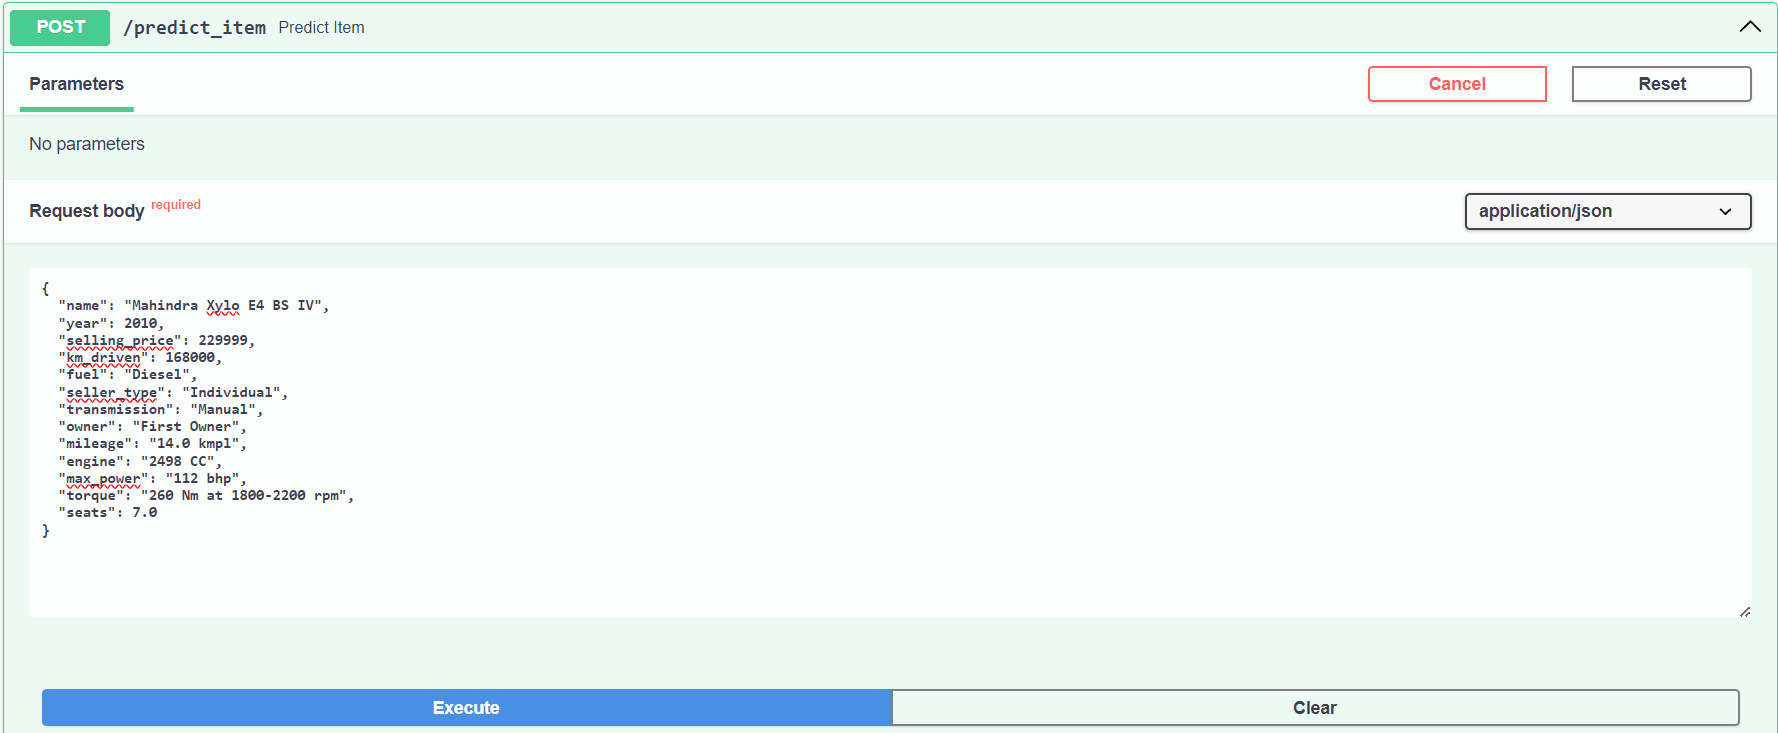
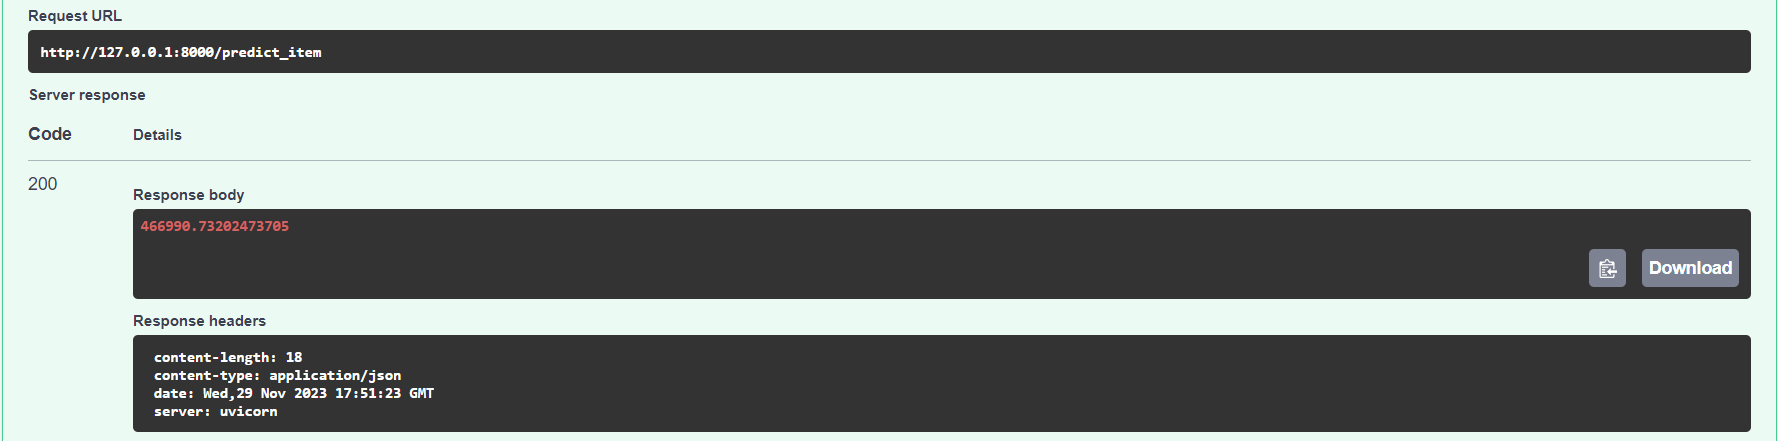

В качестве входных данных подаются признаки одного объекта в формате `JSON`, в качестве выходных данных -- предсказанная стоимость автомобиля типа `float`.

Метод `POST` предсказания стоимости списка объектов:

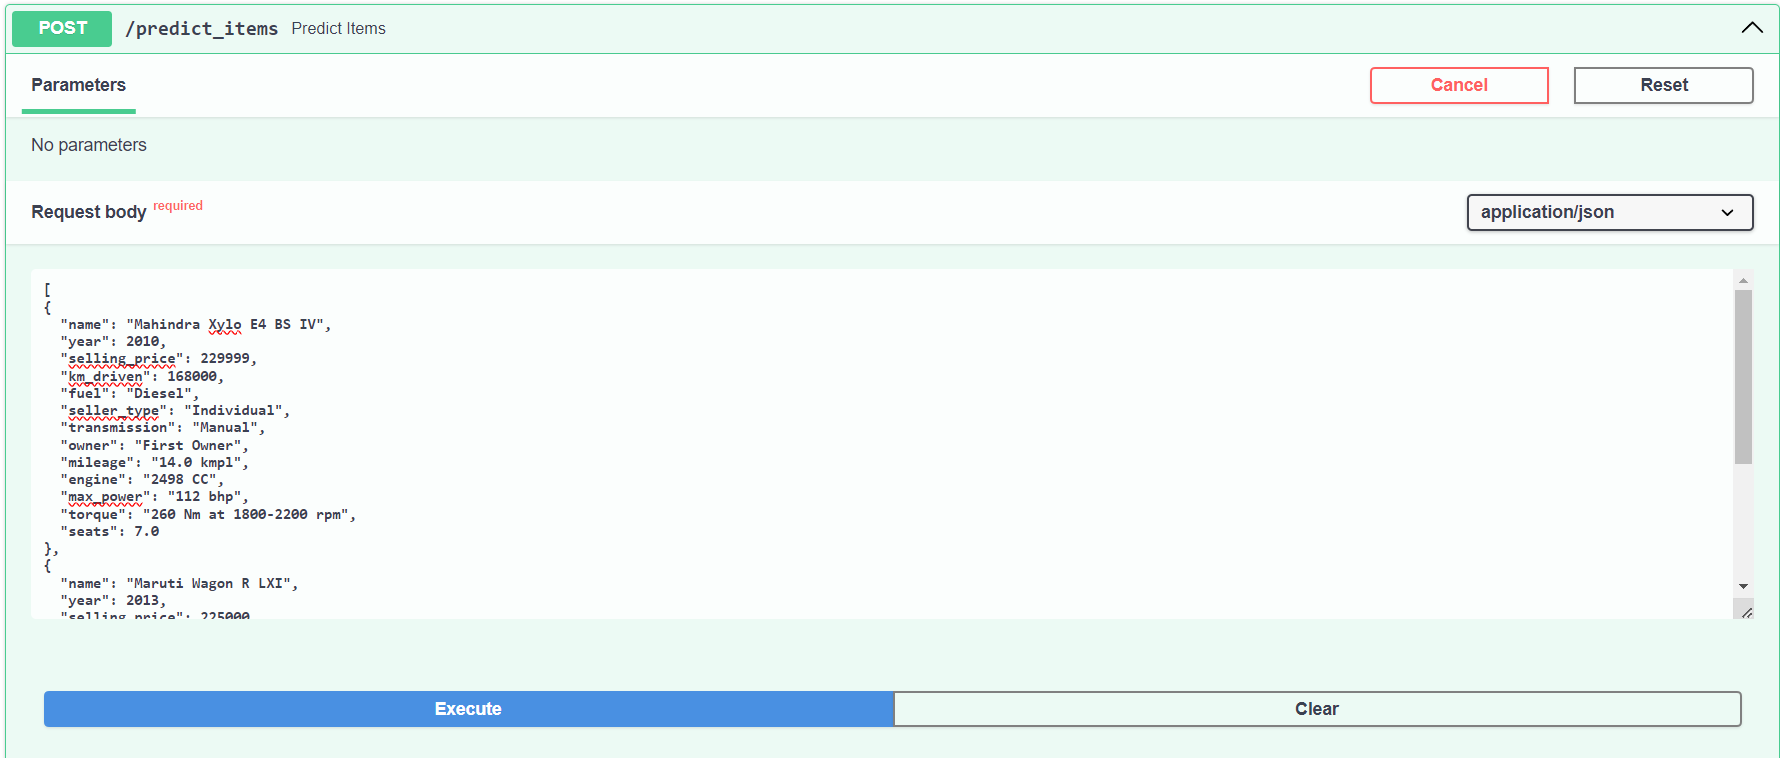
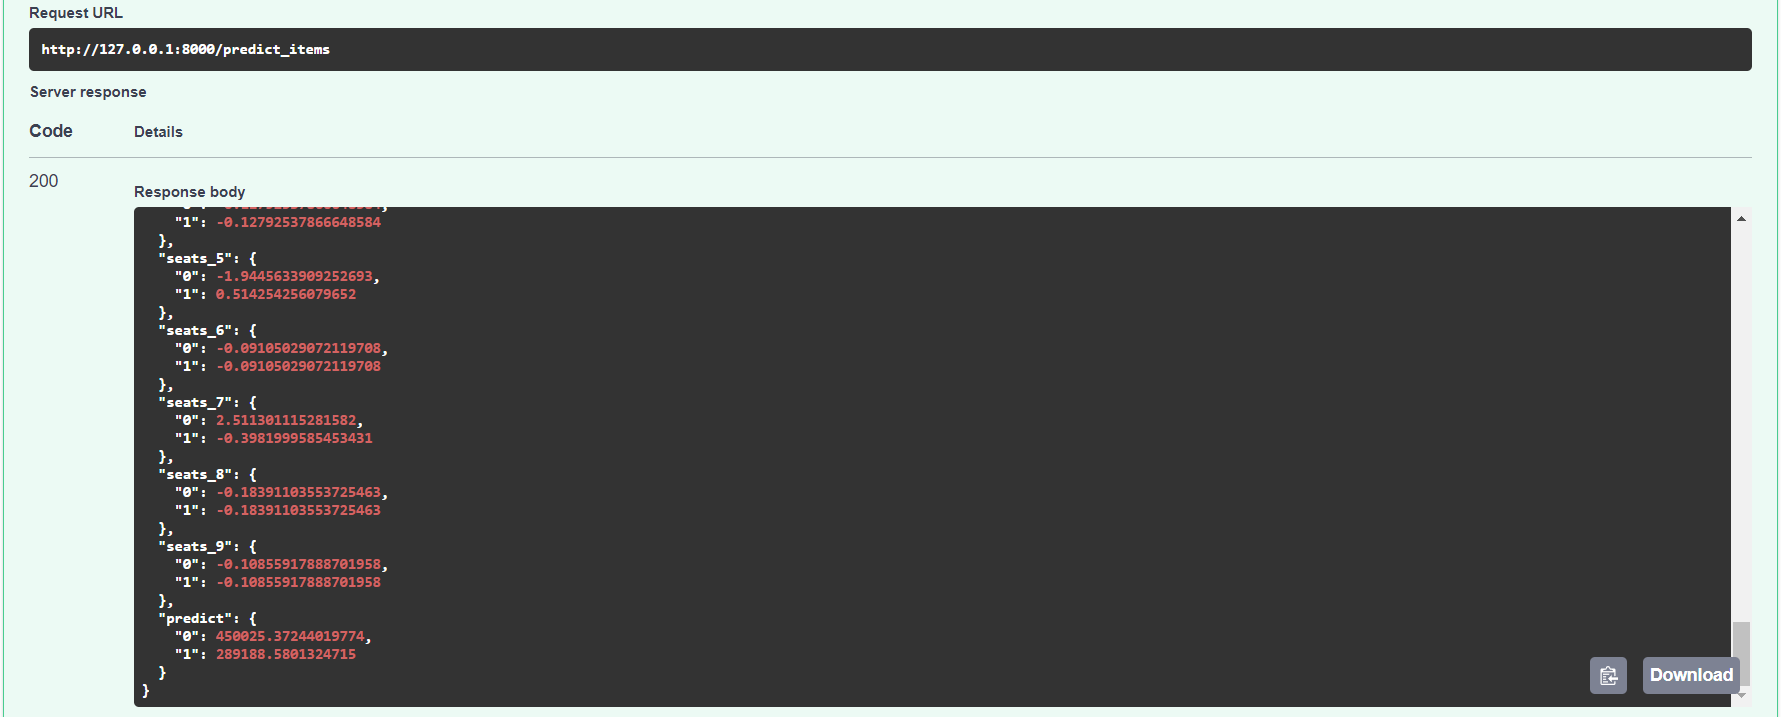

В качестве входных данных подаются признаки списка объектов в формате списка `JSON`, в качестве выходных данных -- тот же список `JSON` с добавленным ключом `predict` для каждого объекта, в котором записаны предсказанные стоимости автомобилей.

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link